Gold Atlantis: Repaying the Credit

As an analyst, you need to analyze the credit data of Gold Atlantis, figure out various patterns in the data, and make interpretations. The aim of this analysis is to help the firm identify those customers who have a lower probability of becoming a defaulter.

In [1]:
import matplotlib.pyplot as plt             
# to visualize
from tabulate import tabulate               
# to print the table
import matplotlib as mat                    
# to visualize 
import seaborn as sns                       
# to visualize
import pandas as pd                         
# for data reading
import numpy as np                          
# for numerical computation

In [2]:
# reading the csv file using the pandas library
df = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


#### Level-0 Analysis,Understanding the data

In [3]:
df.head() 
# head prints the top 5 rows 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [4]:
df.tail() 
# tail returns the bottom 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [5]:
print(df.shape) 
# returns a tuple with the details number of rows and columns 

(100000, 24)


In [6]:
print("The column names of the dataframe: \n")
print(df.columns)
# returns array of columns in dataset 

The column names of the dataframe: 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [7]:
df.info()       
# returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

#### Checking if there are null values in any columns

In [8]:
df.isnull().sum()       
# isnull returns the True/False dataframe
# sum: counts the number of True in columns

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

### Level 1 , Analysis

### Separating Categorical and Numerical Variables

In [9]:
# Seprating the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                             # here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)   
# Calling the function

# Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


### Univariate Analysis

User-defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [10]:
def info_of_cat(col):
    # Unique values
    unique_values = list(df[col].unique())
    print(f"Unique values in {col} are: {unique_values}")

    # Mode
    mode_value = df[col].mode().iloc[0]
    print(f"Mode of {col} is {mode_value}")

    # Missing values
    missing_values = df[col].isnull().sum()
    print(f"Number of missing values in {col} is {missing_values}")


In [11]:
info_of_cat("TARGET")

Unique values in TARGET are: [1, 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


TARGET is nominal datatype

### Visual presentation 

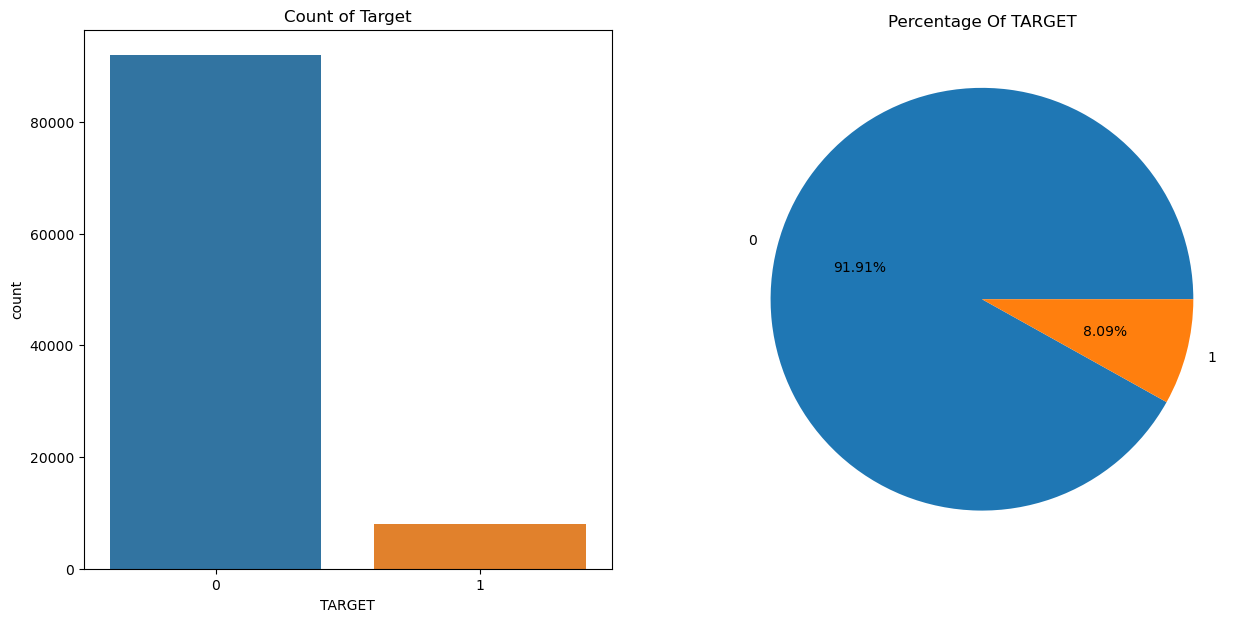

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of Target")                  
# Set the title of the graph

percentage = df["TARGET"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["TARGET"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["TARGET"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of TARGET")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation:  
TARGET - 1 (indicates the he/she had the late payment),
TARGET - 0 (indicates no issues with payment)
From the above visualization the percentage of TARGET - 0 is greater than TARGET - 1

In [13]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans', 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


NAME_CONTRACT_TYPE is nominal datatype

### Visual presentation 

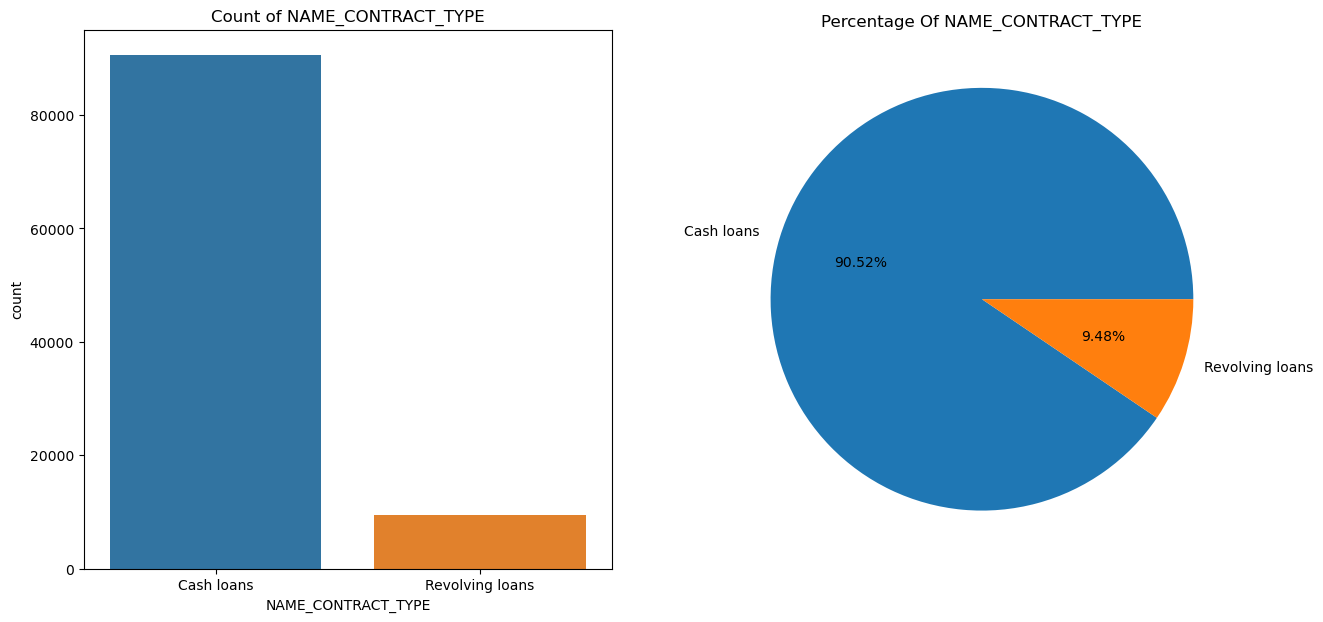

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of NAME_CONTRACT_TYPE")                  
# Set the title of the graph

percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of NAME_CONTRACT_TYPE")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation:  
The Cash loans percentage is high when compare to the Revovling loans percentage

In [15]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M', 'F', 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


GENDER is a nominal datatype

### Visual presentation 

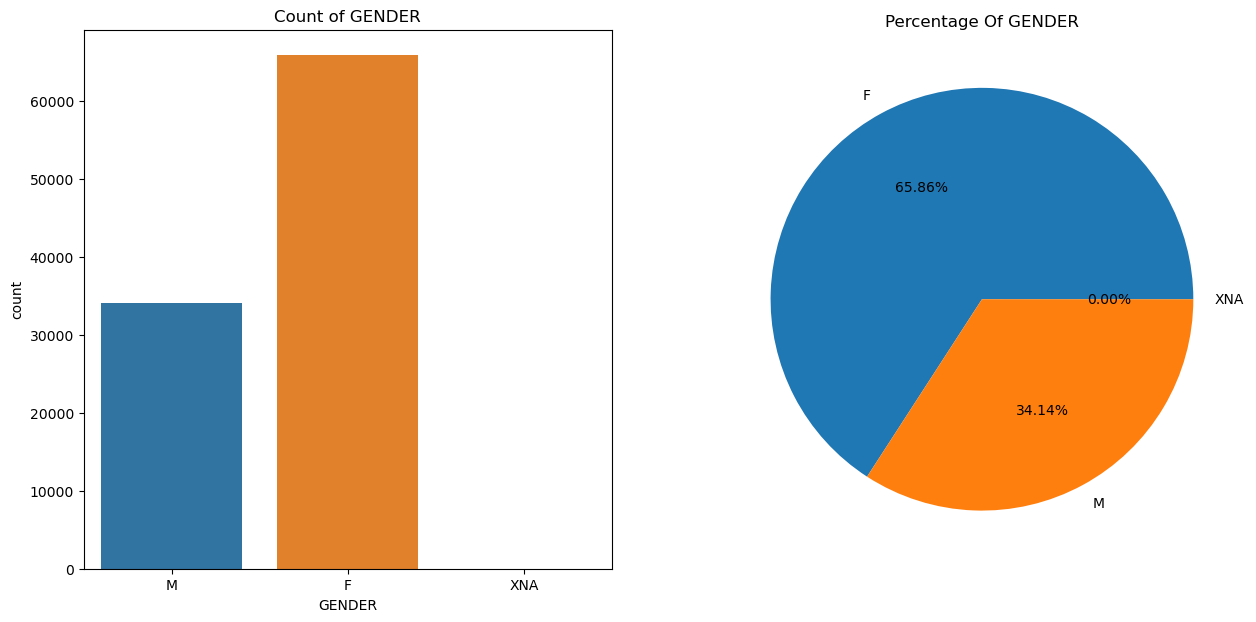

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of GENDER")                  
# Set the title of the graph

percentage = df["GENDER"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["GENDER"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["GENDER"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of GENDER")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation:
The count female gender is high when compare to the males

In [17]:
info_of_cat("Car")

Unique values in Car are: ['N', 'Y']
Mode of Car is N
Number of missing values in Car is 0


CAR is a nominal datatype

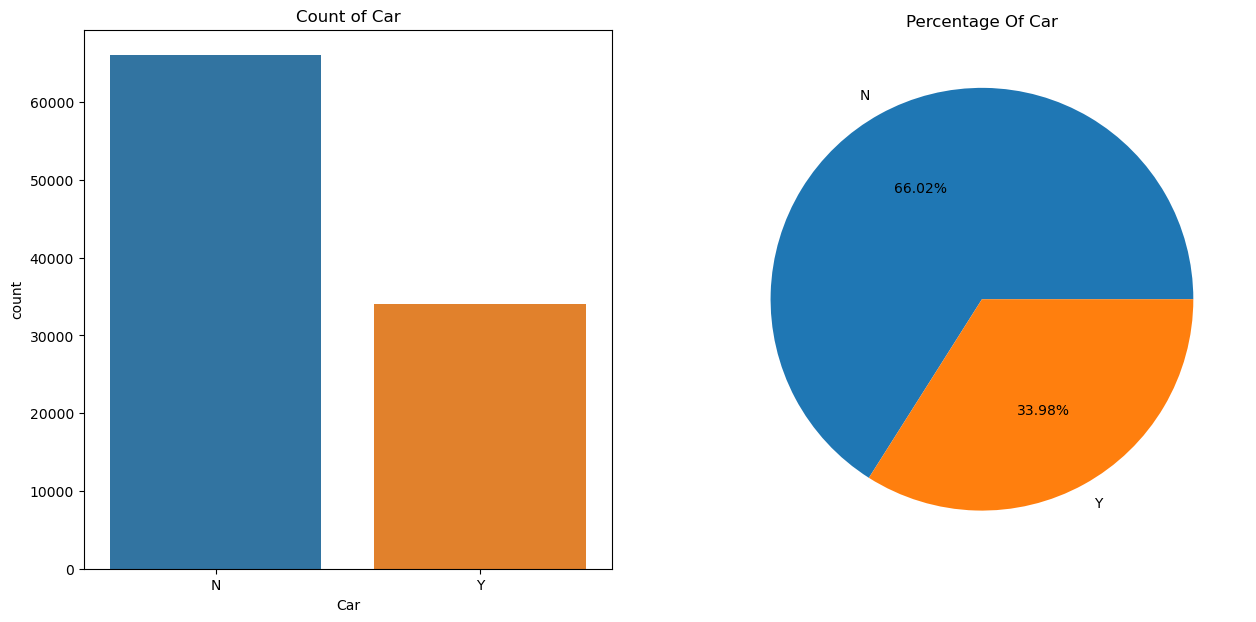

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of Car")                  
# Set the title of the graph

percentage = df["Car"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["Car"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["Car"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of Car")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation :
There are less percentage of people having the car , most of the people don't have the cars

In [19]:
info_of_cat("House")

Unique values in House are: ['Y', 'N']
Mode of House is Y
Number of missing values in House is 0


House is a nominal datatype

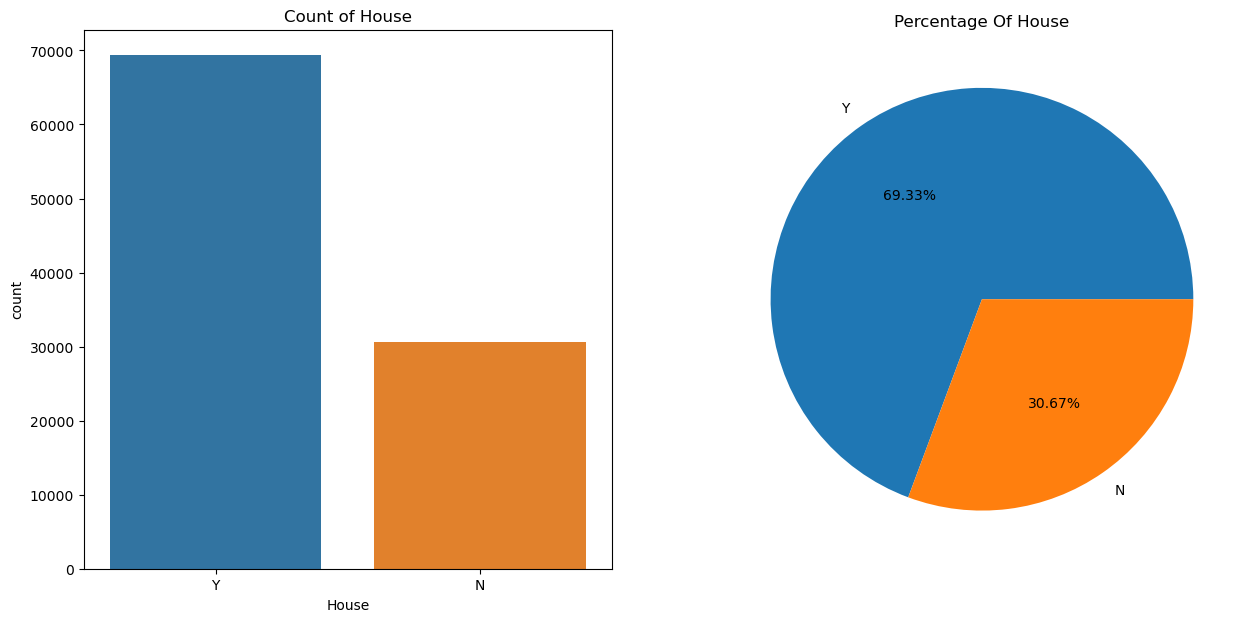

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of House")                  
# Set the title of the graph

percentage = df["House"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["House"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["House"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of House")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation
More number of clients having their own houses

In [21]:
info_of_cat("CNT_CHILDREN")

Unique values in CNT_CHILDREN are: [0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


CNT_CHILDREN is ordinal datatype

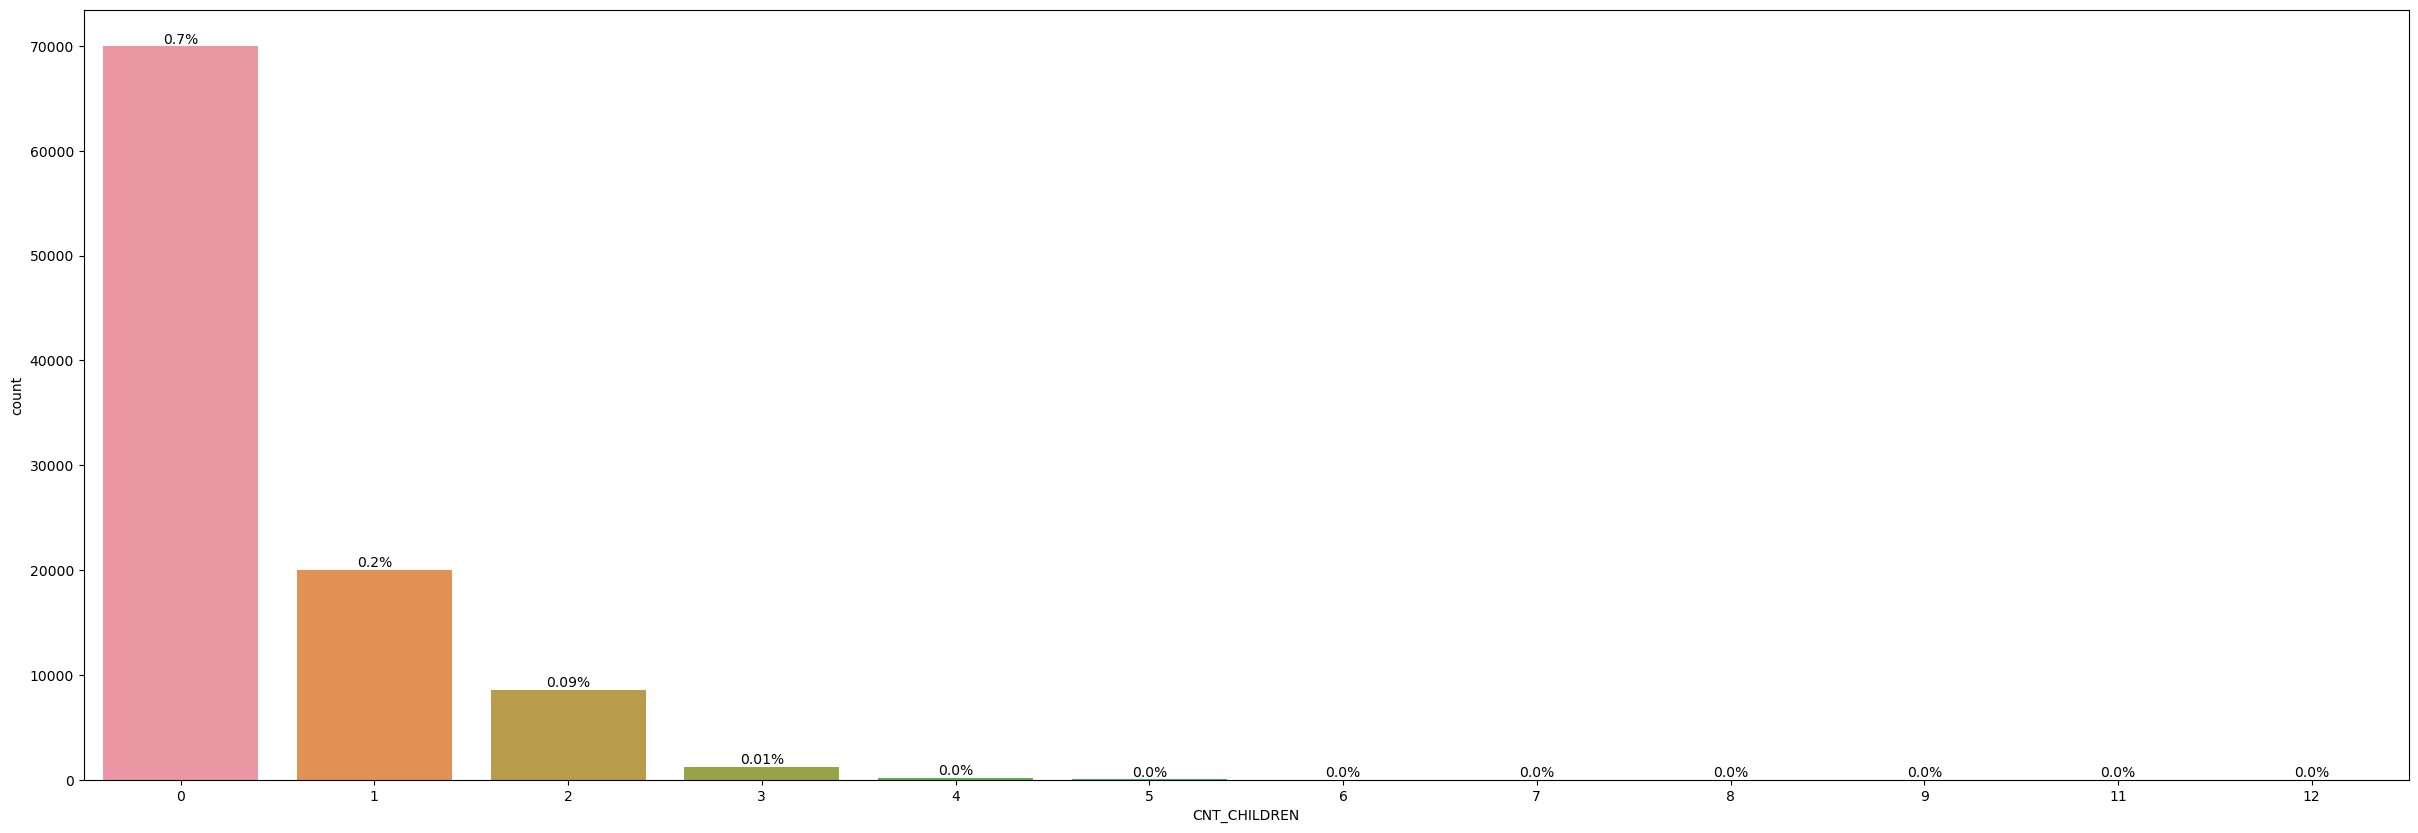

In [22]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["CNT_CHILDREN"])
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          
    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
    # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             
    # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

### Interpretation
The count of children is zero for more number of clients and 0.2% of clients having 1 child

In [23]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405


NAME_TYPE_SUITE is ordinal datatype

###    Missing value treatment

In [24]:
mode_value = df.NAME_TYPE_SUITE.mode()[0]
print(mode_value)
df["NAME_TYPE_SUITE"].fillna(mode_value, inplace = True)

Unaccompanied


NAME_TYPE_SUITE
Unaccompanied      81.194
Family             13.102
Spouse, partner     3.704
Children            1.072
Other_B             0.556
Other_A             0.287
Group of people     0.085
Name: count, dtype: float64


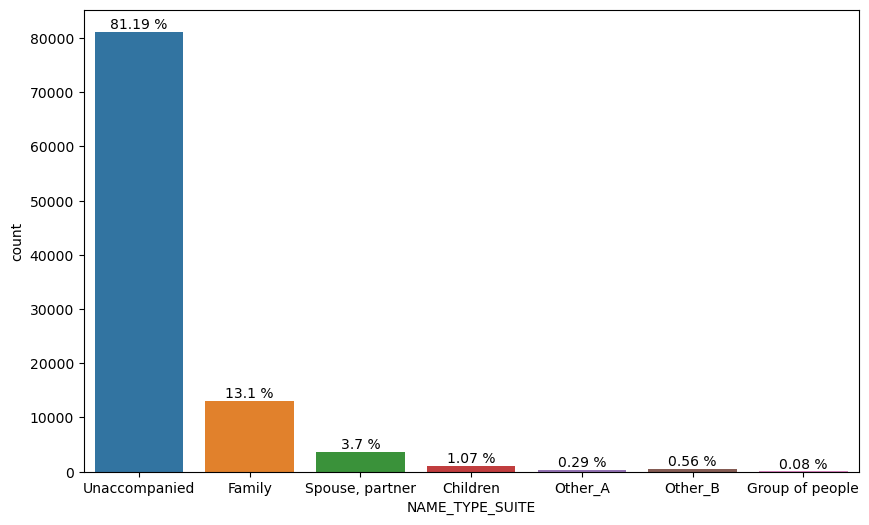

In [25]:
print((df["NAME_TYPE_SUITE"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = df['NAME_TYPE_SUITE'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

### Interpretation:
The percentage of Unaccompainied is high when compared to the other clients


In [26]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


NAME_INCOME_TYPE is ordinal datatype

NAME_INCOME_TYPE
Working                 51.902
Commercial associate    23.217
Pensioner               17.857
State servant            7.000
Unemployed               0.010
Student                  0.009
Businessman              0.004
Maternity leave          0.001
Name: count, dtype: float64


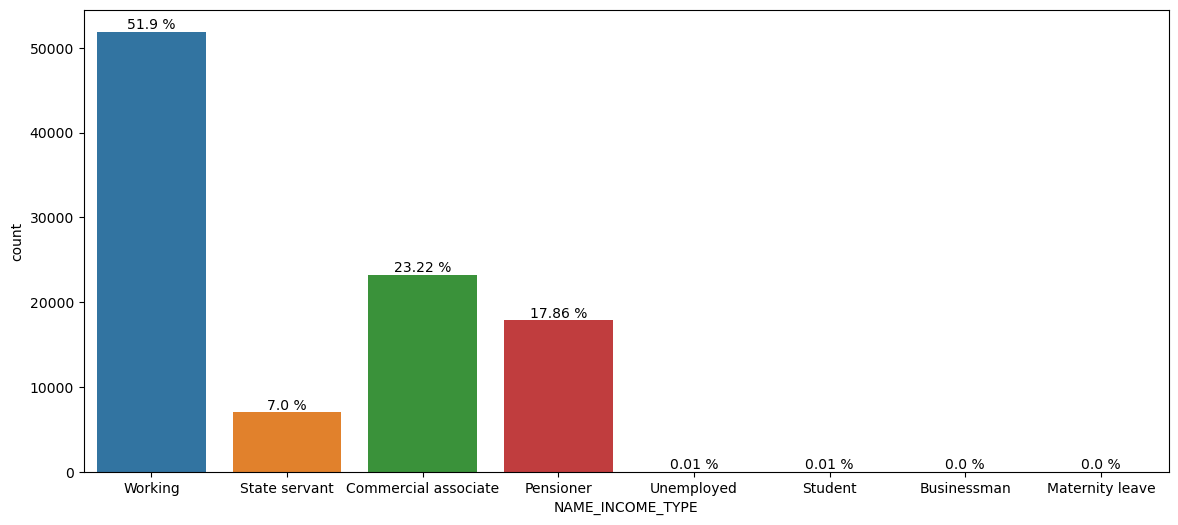

In [27]:
print((df["NAME_INCOME_TYPE"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (14, 6))
sns.countplot(x = df['NAME_INCOME_TYPE'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

### Interpretation:
More percentage of clients are the working income type

In [28]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


NAME_EDUCATION_TYPE is ordinal datatype

NAME_EDUCATION_TYPE
Secondary / secondary special    71.068
Higher education                 24.399
Incomplete higher                 3.270
Lower secondary                   1.214
Academic degree                   0.049
Name: count, dtype: float64


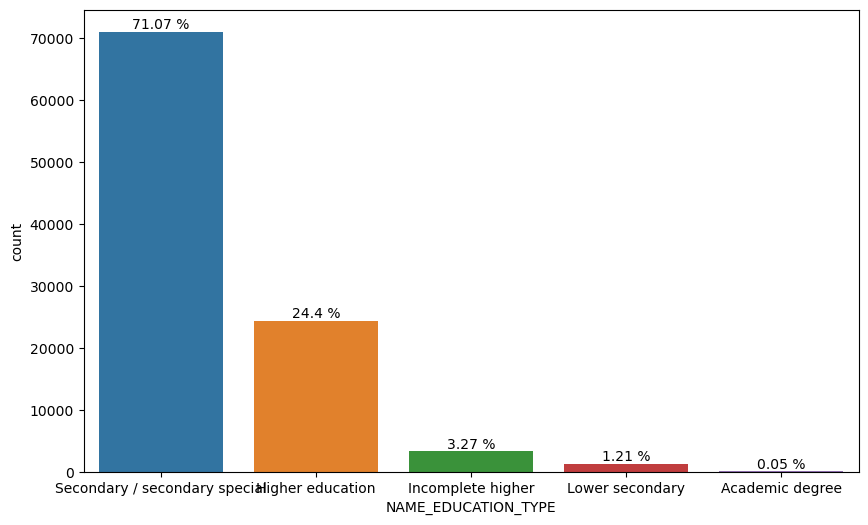

In [29]:
print((df["NAME_EDUCATION_TYPE"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = df['NAME_EDUCATION_TYPE'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

### Interpretation:
Secondary level special education type clients percentage is more when compare to the other type of education

In [30]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are: ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


NAME_FAMILY_STATUS is ordinal datatype

NAME_FAMILY_STATUS
Married                 64.058
Single / not married    14.571
Civil marriage           9.769
Separated                6.347
Widow                    5.254
Unknown                  0.001
Name: count, dtype: float64


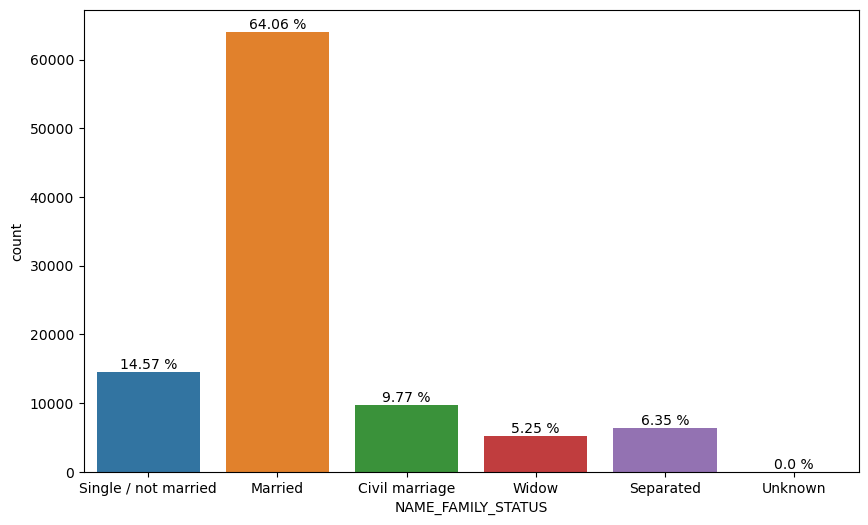

In [31]:
print((df["NAME_FAMILY_STATUS"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = df['NAME_FAMILY_STATUS'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

### Interpretation:
Married clients percentage is high when compared to other types of family status

In [32]:
info_of_cat("MOBILE")

Unique values in MOBILE are: [1, 0]
Mode of MOBILE is 1
Number of missing values in MOBILE is 0


MOBILE is a nominal datatype

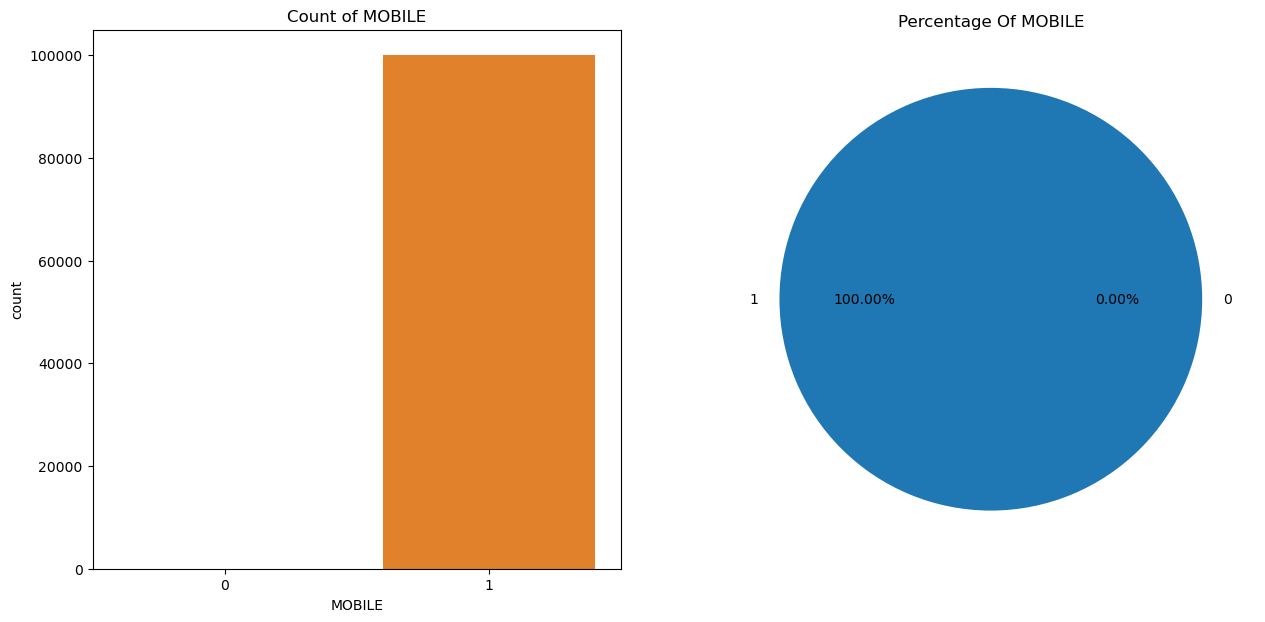

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of MOBILE")                  
# Set the title of the graph

percentage = df["MOBILE"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["MOBILE"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["MOBILE"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of MOBILE")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Interpretation :
Client providing the mobile percentage is high 

In [34]:
info_of_cat("HOME_PHONE")

Unique values in HOME_PHONE are: [0, 1]
Mode of HOME_PHONE is 0
Number of missing values in HOME_PHONE is 0


HOME_PHONE is nominal datatype

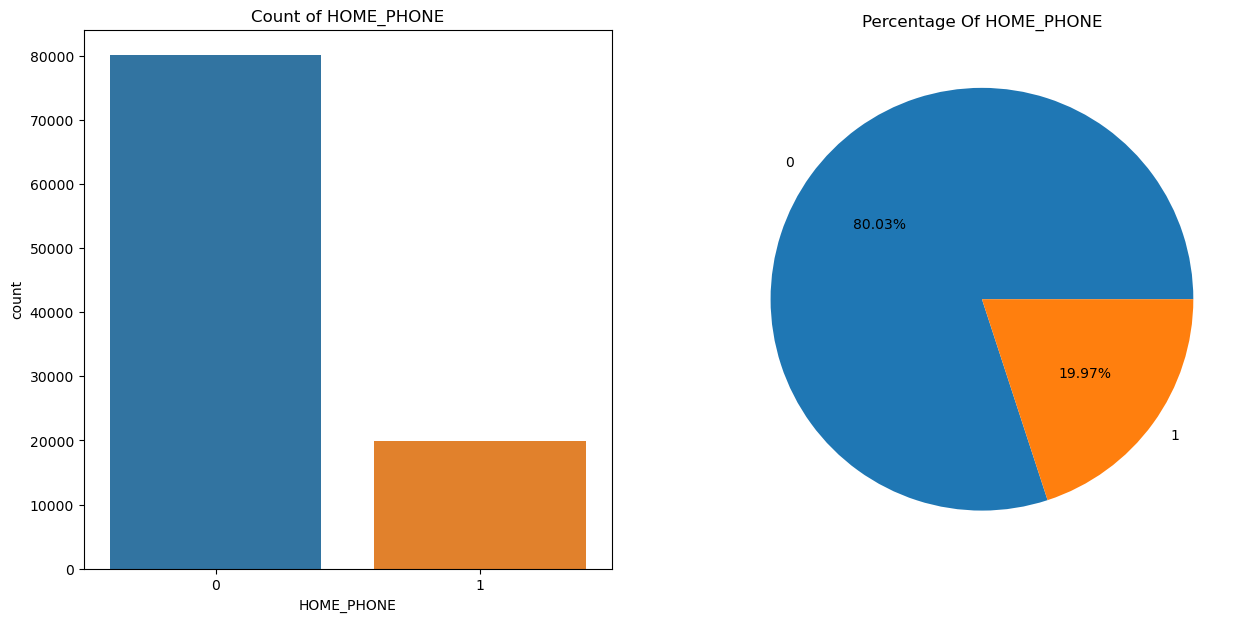

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of HOME_PHONE")                  
# Set the title of the graph

percentage = df["HOME_PHONE"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["HOME_PHONE"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["HOME_PHONE"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of HOME_PHONE")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [36]:
info_of_cat("WORK_PHONE")

Unique values in WORK_PHONE are: [1, 0]
Mode of WORK_PHONE is 1
Number of missing values in WORK_PHONE is 0


WORK_PHONE is a nominal datatype

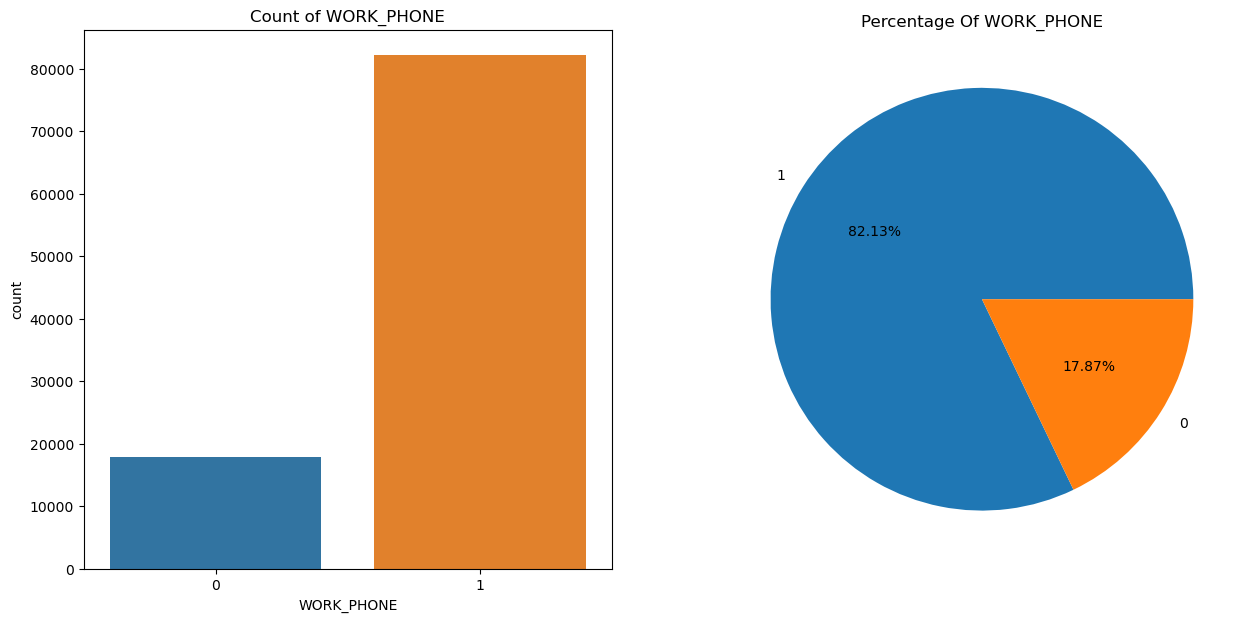

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of WORK_PHONE")                  
# Set the title of the graph

percentage = df["WORK_PHONE"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["WORK_PHONE"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["WORK_PHONE"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of WORK_PHONE")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [38]:
info_of_cat("MOBILE_REACHABLE")

Unique values in MOBILE_REACHABLE are: [1, 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


MOBILE_REACHABLE is nominal datatype

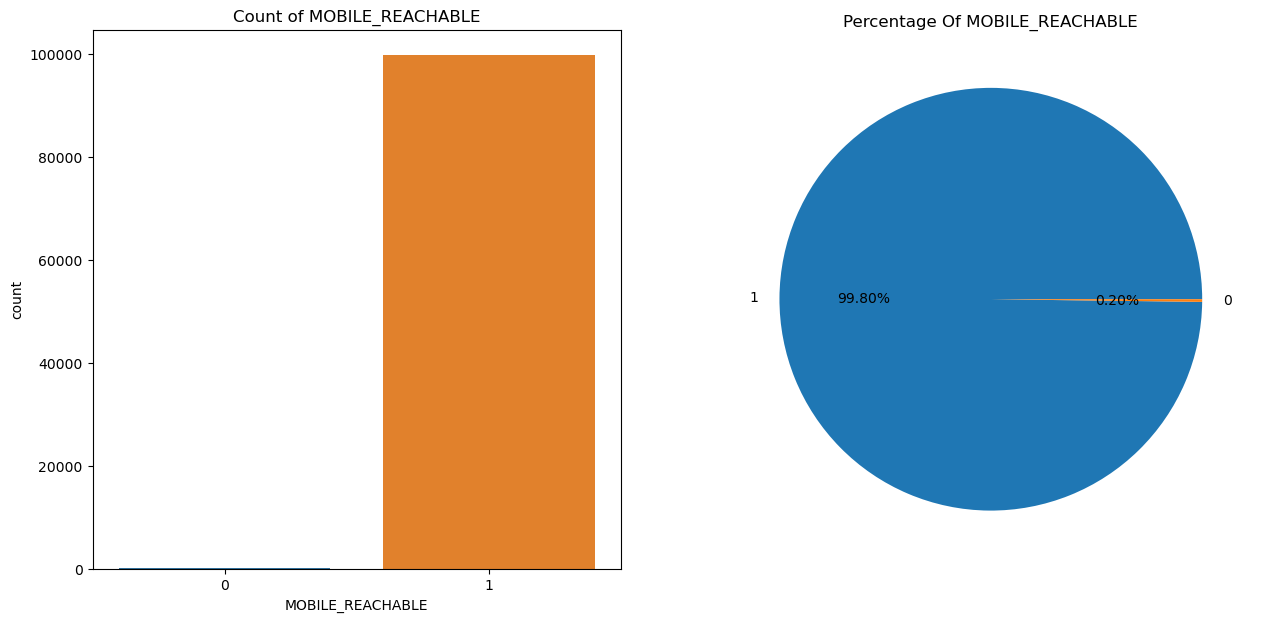

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of MOBILE_REACHABLE")                  
# Set the title of the graph

percentage = df["MOBILE_REACHABLE"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["MOBILE_REACHABLE"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["MOBILE_REACHABLE"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of MOBILE_REACHABLE")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [40]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0, 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


FLAG_EMAIL is a nominal datatype

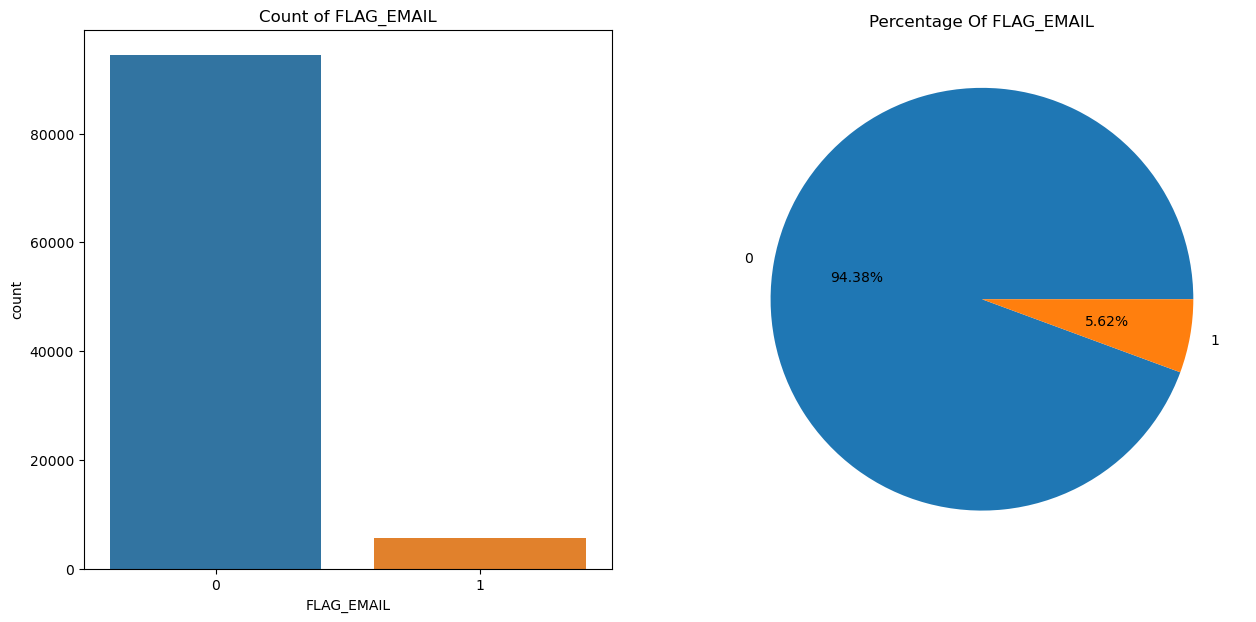

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
# This part of the code creates a figure with 1 row and 2 columns of subplots
# So, we will have a figure with two side-by-side subplots.
ax[0].set_title("Count of FLAG_EMAIL")                  
# Set the title of the graph

percentage = df["FLAG_EMAIL"].value_counts()         
# value_counts: returns the count of values in series: return series

labels = list(df["FLAG_EMAIL"].value_counts().index) 
# Converting the index of value counts into list

sns.countplot(x = df["FLAG_EMAIL"], ax = ax[0])
# counting the occurrences of each unique value in a categorical variable and plotting the results as bars.

ax[1].set_title("Percentage Of FLAG_EMAIL")
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [42]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224


OCCUPATION_TYPE is ordinal datatype

In [43]:
# Missing values

mode_value = df.OCCUPATION_TYPE.mode()[0]
print(mode_value)
df["OCCUPATION_TYPE"].fillna(mode_value, inplace = True)

Laborers


OCCUPATION_TYPE
Laborers                 49.201
Sales staff              10.383
Core staff                8.952
Managers                  6.969
Drivers                   6.057
High skill tech staff     3.650
Accountants               3.258
Medicine staff            2.851
Security staff            2.201
Cooking staff             1.954
Cleaning staff            1.512
Private service staff     0.863
Low-skill Laborers        0.705
Waiters/barmen staff      0.437
Secretaries               0.415
Realty agents             0.242
HR staff                  0.181
IT staff                  0.169
Name: count, dtype: float64


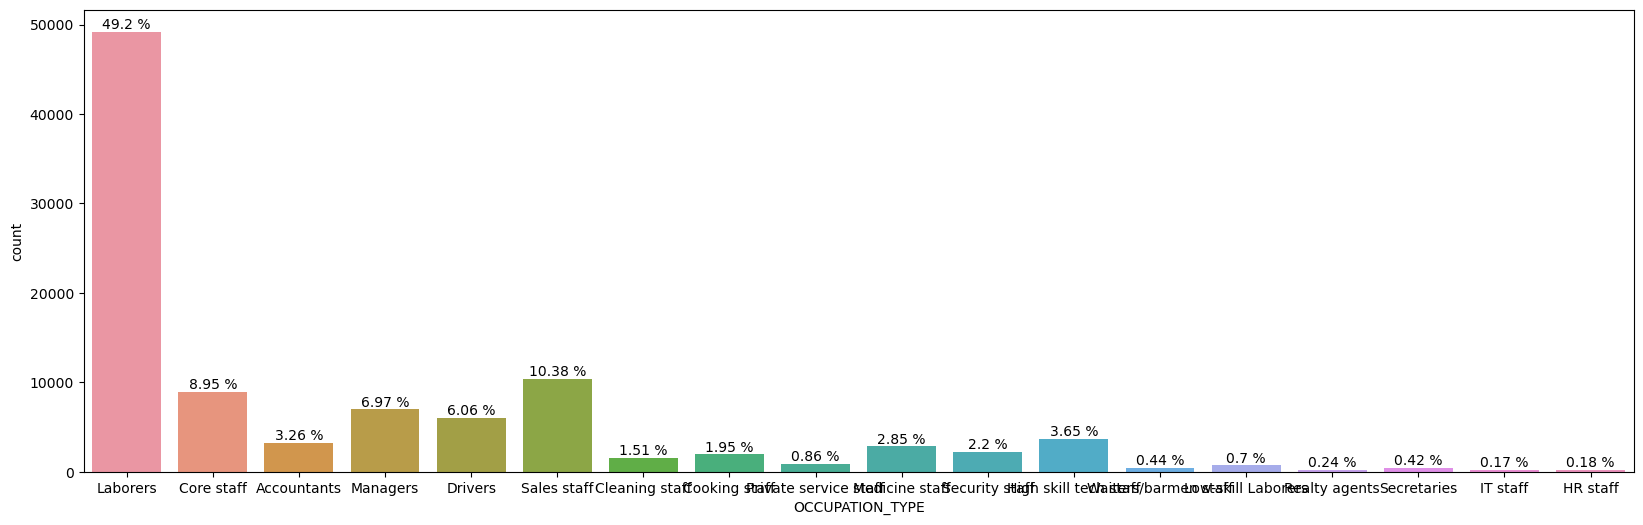

In [44]:
print((df["OCCUPATION_TYPE"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = df['OCCUPATION_TYPE'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

In [45]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 7.0, 8.0, 10.0, 13.0, nan, 14.0]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1


CNT_FAM_MEMBERS is ordinal datatype

In [46]:
# Missing value
mode_value = df.CNT_FAM_MEMBERS.mode()[0]
print(mode_value)
df["CNT_FAM_MEMBERS"].fillna(mode_value, inplace = True)

2.0


CNT_FAM_MEMBERS
2.0     51.722
1.0     21.810
3.0     17.161
4.0      7.965
5.0      1.158
6.0      0.139
7.0      0.031
8.0      0.008
9.0      0.002
10.0     0.002
13.0     0.001
14.0     0.001
Name: count, dtype: float64


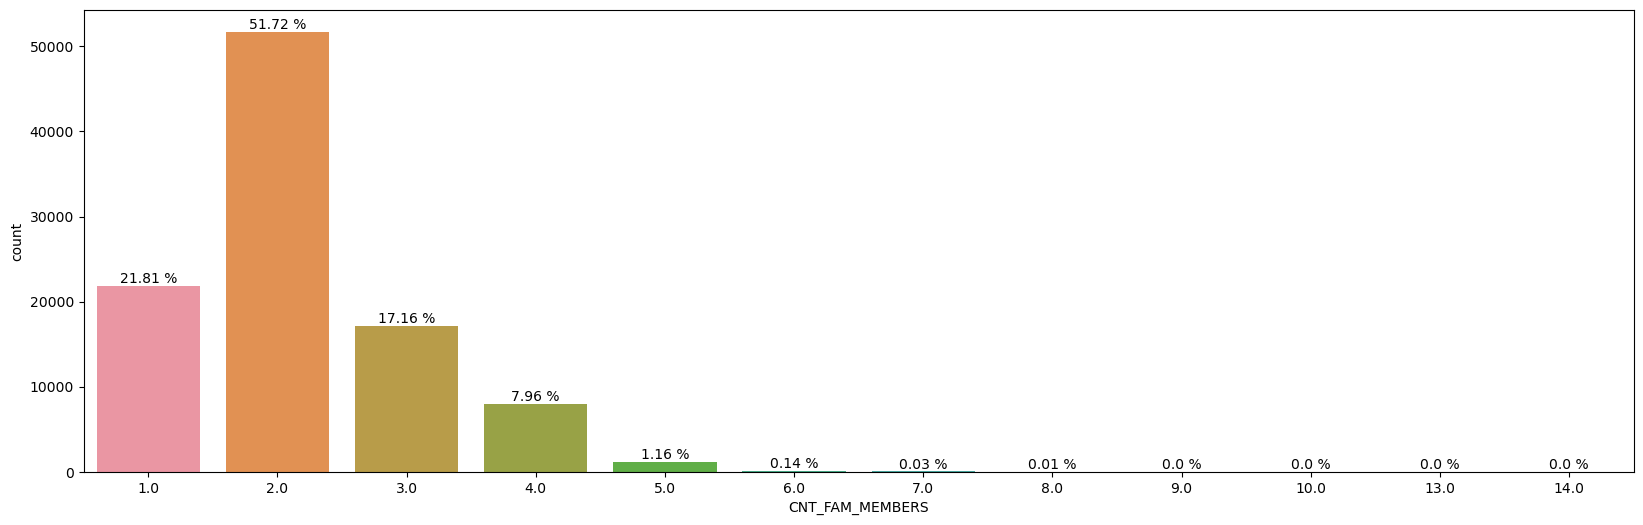

In [47]:
print((df["CNT_FAM_MEMBERS"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = df['CNT_FAM_MEMBERS'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

In [48]:
info_of_cat("APPLICATION_DAY")

Unique values in APPLICATION_DAY are: ['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY', 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY
Number of missing values in APPLICATION_DAY is 0


APPLICATION_DAY is ordinal datatype

APPLICATION_DAY
TUESDAY      17.408
WEDNESDAY    16.924
MONDAY       16.543
FRIDAY       16.478
THURSDAY     16.464
SATURDAY     10.980
SUNDAY        5.203
Name: count, dtype: float64


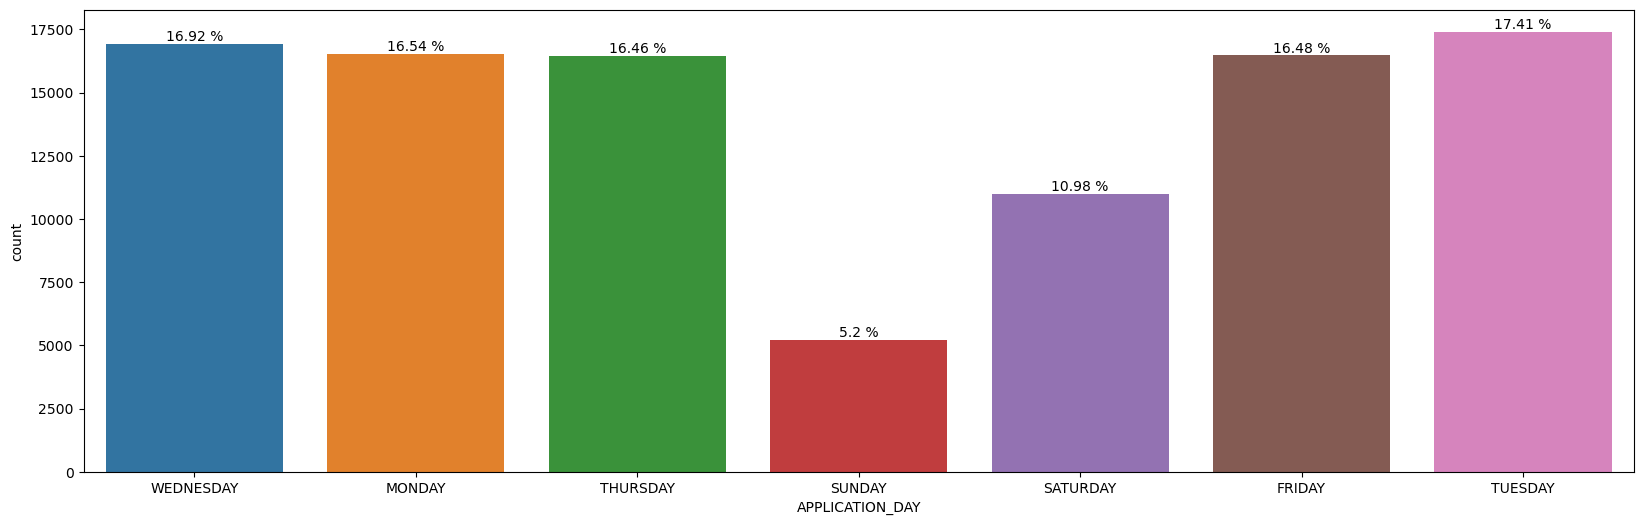

In [49]:
print((df["APPLICATION_DAY"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = df['APPLICATION_DAY'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

In [50]:
info_of_cat("TOTAL_DOC_SUBMITTED")

Unique values in TOTAL_DOC_SUBMITTED are: [1, 0, 2, 3, 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


TOTAL_DOC_SUBMITTED is ordinal datatype

TOTAL_DOC_SUBMITTED
1    87.860
0     9.536
2     2.552
3     0.051
4     0.001
Name: count, dtype: float64


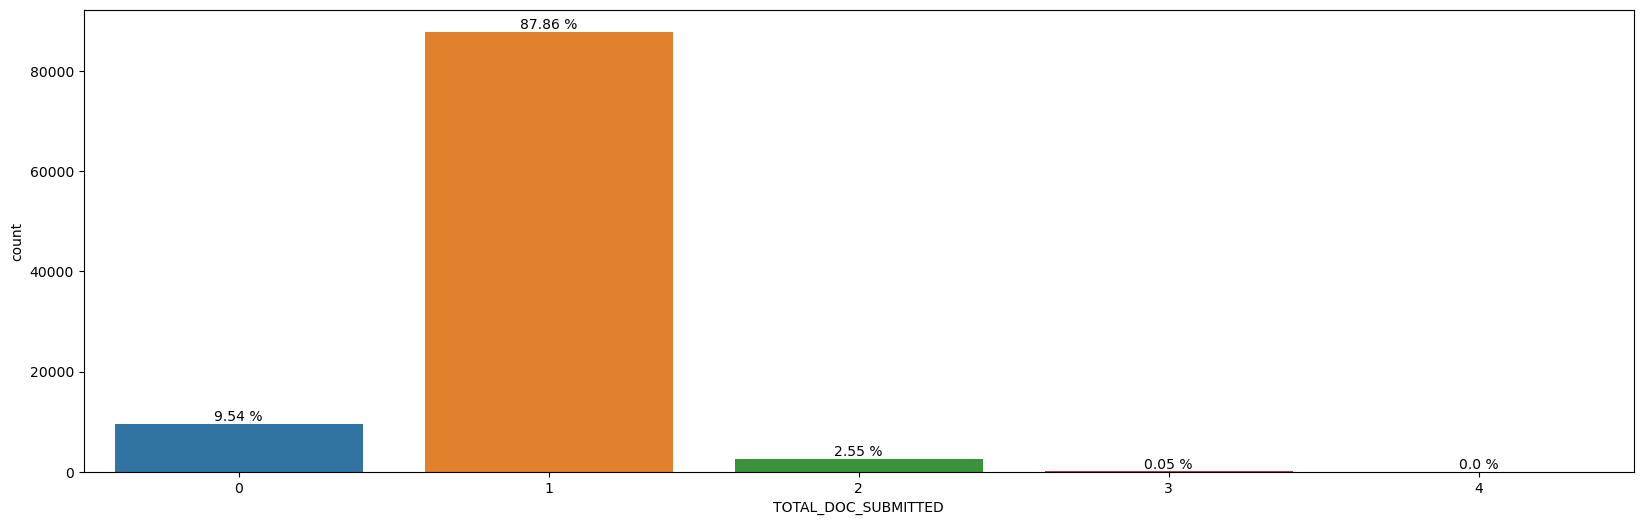

In [51]:
print((df["TOTAL_DOC_SUBMITTED"].value_counts()/len(df))*100)               
#First calculated the number of income category via value counts inbuilt function and then calculated the percentage of it.
fig, ax = plt.subplots(figsize = (20, 6))
sns.countplot(x = df['TOTAL_DOC_SUBMITTED'], ax = ax)
for bar in ax.patches: # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
    # first it calculate the bar height and then dividing by the number of rows in data and 
    # multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                
    # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                
    # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       
    # annotate: used to annotate over objects. here objects are the bars.
plt.show()

## Analysis of Numerical Columns

In [52]:
## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [53]:
info_of_numerical("SK_ID_CURR")

The mean of the SK_ID_CURR is 158006.14086
The median of the SK_ID_CURR is 157877.0
The mode of the SK_ID_CURR is 100002
The standard deviation of the SK_ID_CURR is 33481.16699608501
Number of missing values in the SK_ID_CURR is 0


SK_ID_CURR is continuous data

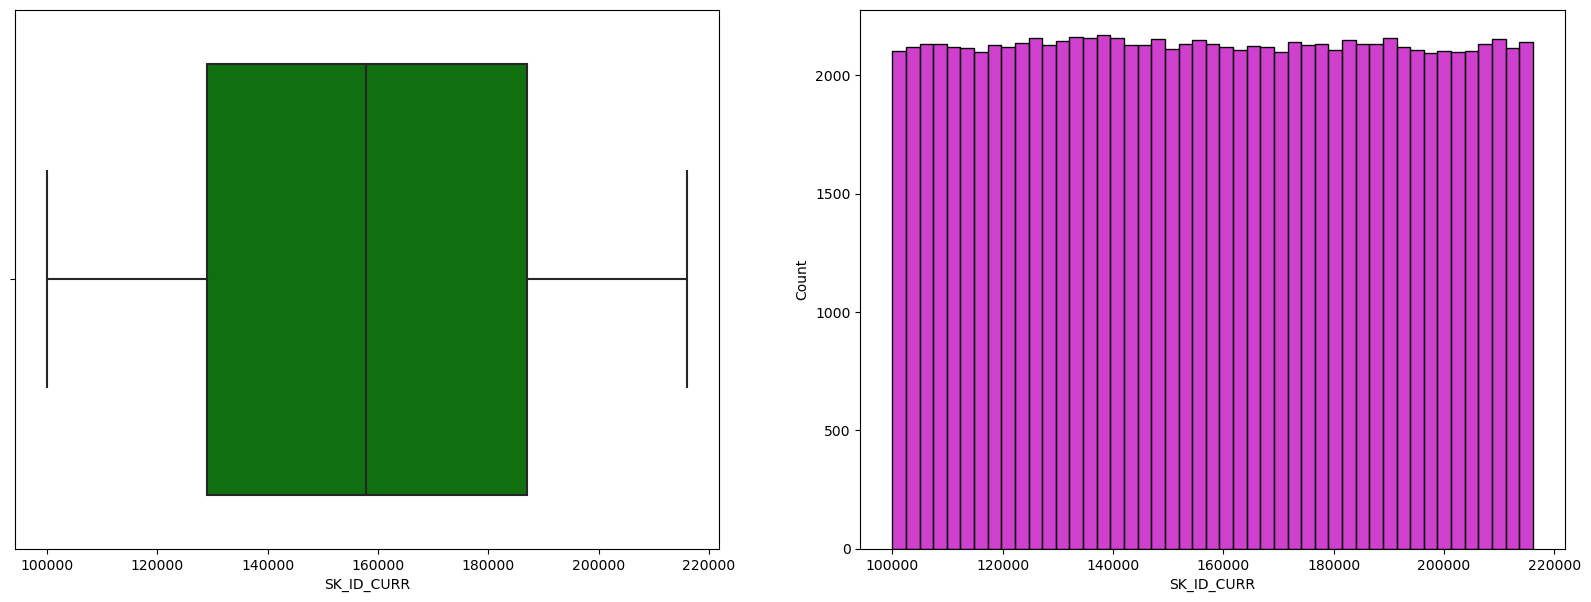

In [54]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
# Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["SK_ID_CURR"], ax =ax[1], color = "m") 
# ax[1] means image will plot at the second space
sns.boxplot(x = df["SK_ID_CURR"], ax = ax[0], color = "g") 
# ax[0] means image will plot at the second space
plt.show()


### Interpretation :
There are no outliers in  SK_ID_CURR

In [55]:
info_of_numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


AMT_INCOME_TOTAL is a continuos data

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["AMT_INCOME_TOTAL"], ax = ax[1], color= "g")    
# xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['AMT_INCOME_TOTAL'], ax = ax[0], color = "y") 
# color = y:  yellow
plt.show()

In [57]:
info_of_numerical("AMT_CREDIT")

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


In [58]:
AMT_CREDIT is continuos data

SyntaxError: invalid syntax (2705359005.py, line 1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["AMT_CREDIT"], ax = ax[1], color= "g")    
# xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['AMT_CREDIT'], ax = ax[0], color = "y") 
# color = y:  yellow
plt.show()

### Interpretation :
It is a right skewed data

In [ ]:
info_of_numerical("AMT_GOODS_PRICE")

AMT_GOODS_PRICE is continuos data

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["AMT_GOODS_PRICE"], ax = ax[1], color= "g")    
# xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['AMT_GOODS_PRICE'], ax = ax[0], color = "y") 
# color = y:  yellow
plt.show()

In [ ]:
info_of_numerical("DAYS_EMPLOYED")

DAYS_EMPLOYED is continuous data

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["DAYS_EMPLOYED"], ax = ax[1], color= "g")    
# xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = df['DAYS_EMPLOYED'], ax = ax[0], color = "y") 
# color = y:  yellow
plt.show()

### Level 2 (Bi-Variate Analysis)

#### Relationship of TARGET and NAME_CONTRACT_TYPE               

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = "TARGET", hue = "NAME_CONTRACT_TYPE", data = df)
plt.show()

#### Relationship of TARGET and GENDER                              

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = "TARGET", hue = "GENDER", data = df)
plt.show()

### Relationship of TARGET and Car                  

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = "TARGET", hue = "Car", data = df)
plt.show()

### Relationship of TARGET and House                

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = "TARGET", hue = "House", data = df)
plt.show()

### Relationship of TARGET and CNT_CHILDREN

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = "TARGET", hue = "CNT_CHILDREN", data = df)
plt.show()